# Introduction

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.

The goal of this notebook is to use the data to develop a strong model in order to predict which people the bank should market to for their marketing campain to get people to sign up for a saving account.

What is a saving account?

A savings account is an interest-bearing deposit account held at a bank. Though these accounts typically pay only a modest interest rate, their safety and reliability make them a good option for depositing cash that you want available for short-term needs. For more detailed information what is the saving account click on this link: https://www.investopedia.com/terms/s/savingsaccount.asp

In general, datasets which contain marketing data can be used for 2 different business goals:

Prediction of the results of the marketing campaign for each customer and clarification of factors which affect the campaign results. This helps to find out the ways how to make marketing campaigns more efficient.

Finding out customer segments, using data for customers, who will subscribe to the saving deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns.

This dataset contains banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to the deposit subscription. 

Approach

In order to optimize the marketing campaigns with the help of the dataset, we will have to take the following steps:

Import data from dataset and perform initial high-level analysis: look at the number of rows, look at the missing values, look at dataset columns and their values respective to the campaign outcome.

Clean the data: remove irrelevant columns, deal with missing and incorrect values, and turn categorical columns into variables.

Use machine learning techniques to predict the marketing campaign outcome and to find out factors, which affect the success of the campaign.

Bank client data:
    
1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day of the month 

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

21 - deposit - has the client subscribed a saving account? (binary: 'yes','no')

# Importing Data Libraries

In [196]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import pyplot
from numpy import where
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [197]:
df = pd.read_csv('data/bank.csv')

In [198]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [199]:
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

The mean balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<AxesSubplot:>

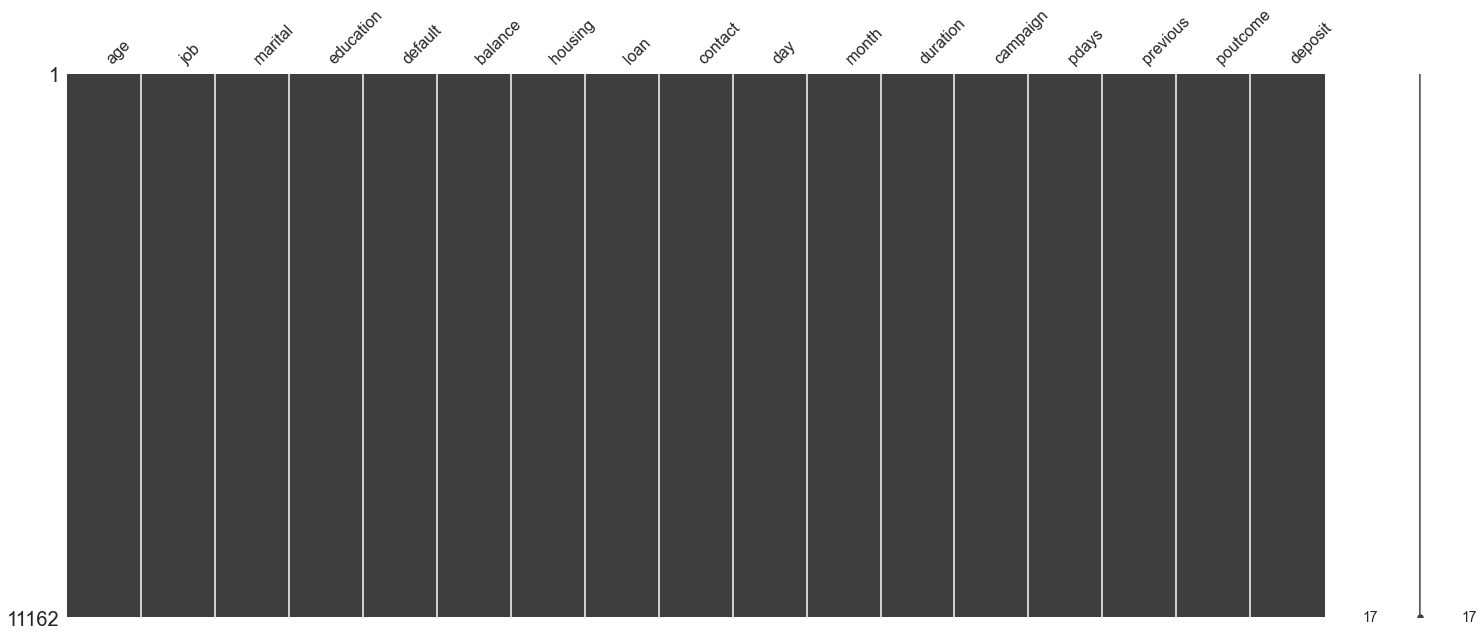

In [201]:
import missingno as msno
msno.matrix(df)

There is no missind data

Below are some interesting insights we can find from the data:

In [202]:
a = float(len(df[df['balance']<=0]))/float((len(df['balance'])))*100
b = len(df[df['balance']<=0])                               
print('{}% or {} of people have 0 or negative balance'.format(round(a,2),b))

13.1% or 1462 of people have 0 or negative balance


In [203]:
c = float(len(df[df['pdays']==-1]))/float((len(df['pdays'])))*100
d = len(df[df['pdays']==-1])                               
print('{}% or {} has not been contacted for the first time'.format(round(c,2),d))

74.57% or 8324 has not been contacted for the first time


Let's identify categotical and numerical columns

In [204]:
cols = df.columns
num_cols= df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [205]:
print('There are {} numeric columns \n which are: {}'.format(len(num_cols), num_cols))

There are 7 numeric columns 
 which are: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [206]:
print('There are {} categorical columns\n which are: {}'.format(len(cat_cols), cat_cols))

There are 10 categorical columns
 which are: ['housing', 'marital', 'education', 'default', 'poutcome', 'loan', 'contact', 'job', 'deposit', 'month']


<function matplotlib.pyplot.show(close=None, block=None)>

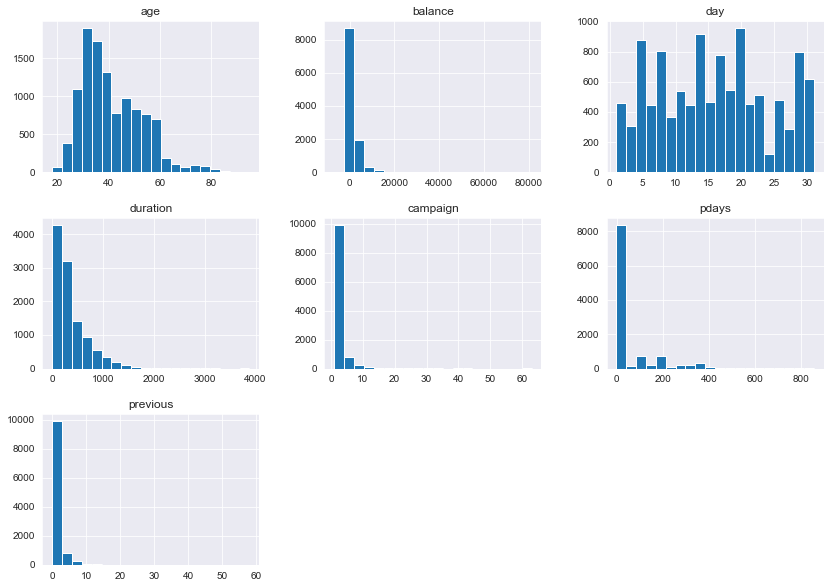

In [207]:
df.hist(bins = 20, figsize=(14,10))

plt.show

In [208]:

df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

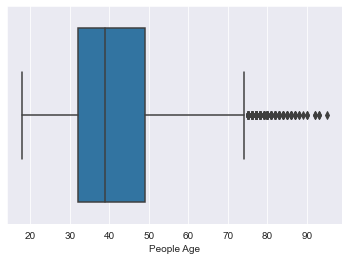

In [209]:
sns.boxplot(x='age', data = df)
plt.xlabel('People Age')

plt.show()

In [210]:
df.age.describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [211]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
IQR=q3-q1
outliers = df[((df['age']<(q1-1.5*IQR)) | (df['age']>(q3+1.5*IQR)))]


print('Ages above {} are outliers'.format(q3 +1.5*IQR))

print('There are {} outliers'.format(len(outliers)))

Ages above 74.5 are outliers
There are 171 outliers


From the above age analyze we cannot conclude that the age of people has high effect whether they will deposit money or not. People of any age could open the account that's why we can fit our model with and without these outliers.

# Analysing our data

Jobs

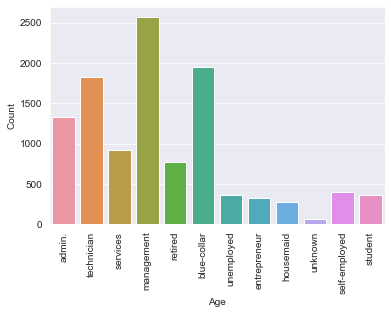

In [212]:
sns.countplot(x='job', data =df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [213]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Marital Status

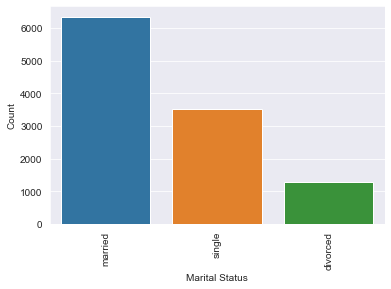

In [214]:
sns.countplot(x='marital', data = df)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [215]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

Education

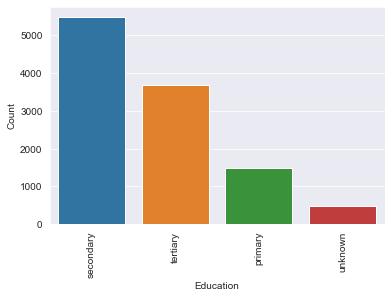

In [216]:
sns.countplot(x='education', data = df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [217]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

Text(0, 0.5, 'Count')

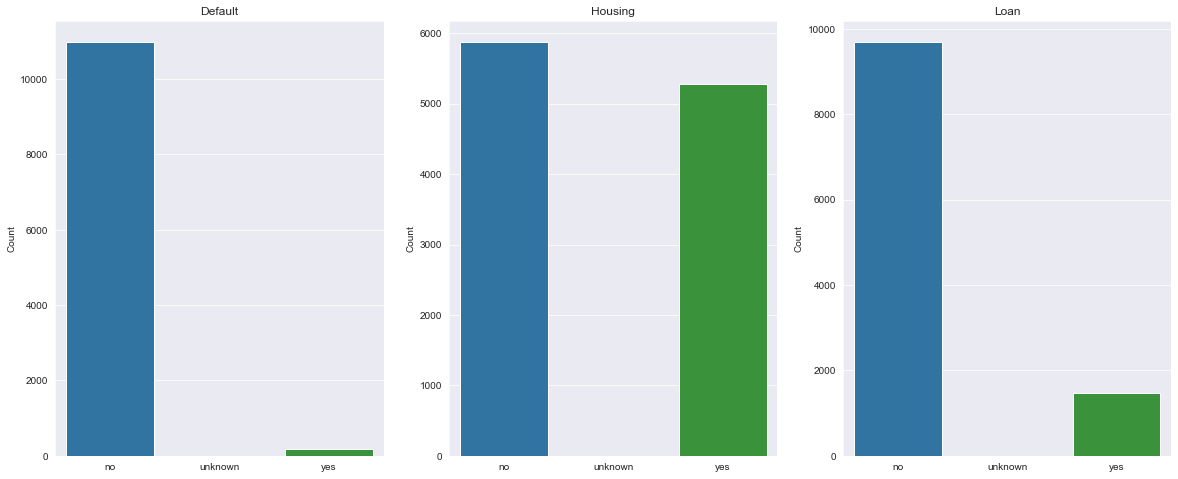

In [218]:
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
# Default, has credit in default ?
sns.countplot(x = 'default', data = df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_xlabel('')
ax1.set_title('Default')
ax1.set_ylabel('Count')
ax1.tick_params()

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_xlabel('')
ax2.set_title('Housing')
ax2.set_ylabel('Count')

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_xlabel('')
ax3.set_title('Loan')
ax3.set_ylabel('Count')



In [219]:
print('Default \n Yes credit by default:',len(df[df['default']=='yes']),
 '\n No credit by default:',len(df[df['default']=='no']),
 '\n Unknown credit by default:',len(df[df['default']=='unknown']))

Default 
 Yes credit by default: 168 
 No credit by default: 10994 
 Unknown credit by default: 0


In [220]:
print('Housing \n Yes credit by housing:',len(df[df['housing']=='yes']),
 '\n No credit by housing:',len(df[df['housing']=='no']),
 '\n Unknown credit by housing:',len(df[df['housing']=='unknown']))

Housing 
 Yes credit by housing: 5281 
 No credit by housing: 5881 
 Unknown credit by housing: 0


In [221]:
print('Loan \n Yes credit by housing:',len(df[df['loan']=='yes']),
 '\n No credit by loan:',len(df[df['loan']=='no']),
 '\n Unknown credit by loan:',len(df[df['loan']=='unknown']))


Loan 
 Yes credit by housing: 1460 
 No credit by loan: 9702 
 Unknown credit by loan: 0


Bank Client Categorical convertion

In [222]:
#function to creat group of ages
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df)

age          job  marital  education default  balance housing loan  \
0        3       admin.  married  secondary      no     2343     yes   no   
1        3       admin.  married  secondary      no       45      no   no   
2        2   technician  married  secondary      no     1270     yes   no   
3        3     services  married  secondary      no     2476     yes   no   
4        3       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157    2  blue-collar   single    primary      no        1     yes   no   
11158    2     services  married  secondary      no      733      no   no   
11159    1   technician   single  secondary      no       29      no   no   
11160    2   technician  married  secondary      no        0      no  yes   
11161    2   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

In [223]:
print("Kind of Contact: \n",df['contact'].unique())
print("\nWhich monthis this campaing work: \n", df['month'].unique())
print("\nWhich days this campaing work: \n", df['day'].unique())

Kind of Contact: 
 ['unknown' 'cellular' 'telephone']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Which days this campaing work: 
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]


In [224]:
df.select_dtypes(include = 'object')

job  marital  education default housing loan   contact month  \
0           admin.  married  secondary      no     yes   no   unknown   may   
1           admin.  married  secondary      no      no   no   unknown   may   
2       technician  married  secondary      no     yes   no   unknown   may   
3         services  married  secondary      no     yes   no   unknown   may   
4           admin.  married   tertiary      no      no   no   unknown   may   
...            ...      ...        ...     ...     ...  ...       ...   ...   
11157  blue-collar   single    primary      no     yes   no  cellular   apr   
11158     services  married  secondary      no      no   no   unknown   jun   
11159   technician   single  secondary      no      no   no  cellular   aug   
11160   technician  married  secondary      no      no  yes  cellular   may   
11161   technician  married  secondary      no      no   no  cellular   jul   

      poutcome deposit  
0      unknown     yes  
1      unknown     yes  
2      unknown     yes  
3      unknown     yes  
4      unknown     yes  
...        ...     ...  
11157  unknown      no  
11158  unknown      no  
11159  unknown      no  
11160  failure      no  
11161  unknown      no  

[11162 rows x 10 columns]

In [80]:
#pip install pandas-profiling

In [81]:
#!pip install pandas_profiling

In [82]:
#conda install -c anaconda pandas-profiling

In [83]:
#import the packages 
import pandas as pd 
import pandas_profiling as pp
from pandas_profiling import ProfileReport

pp.ProfileReport(df)

ProfileReport - will give us detailed report of the features of the data as well as many statistical insights can be drawn from it.

Classification Model

In [225]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in df[cat_cols]:
    df[i]=LE.fit_transform(df[i])
    
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0    3    0        1          1        0     2343        1     0        2   
1    3    0        1          1        0       45        0     0        2   
2    2    9        1          1        0     1270        1     0        2   
3    3    7        1          1        0     2476        1     0        2   
4    3    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

In [226]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1:]

In [227]:
X.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0    3    0        1          1        0     2343        1     0        2   
1    3    0        1          1        0       45        0     0        2   
2    2    9        1          1        0     1270        1     0        2   
3    3    7        1          1        0     2476        1     0        2   
4    3    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0    5      8      1042         1     -1         0         3  
1    5      8      1467         1     -1         0         3  
2    5      8      1389         1     -1         0         3  
3    5      8       579         1     -1         0         3  
4    5      8       673         2     -1         0         3

In [228]:
y.head()

deposit
0        1
1        1
2        1
3        1
4        1

Dividing data into train and test split

In [229]:
y=df['deposit']
X = df.drop('deposit', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify = y)

In [230]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, Ridge,Lasso, ElasticNetCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,confusion_matrix, mean_squared_error,accuracy_score, f1_score,classification_report
from sklearn.preprocessing import StandardScaler


import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm


In [231]:
sc=StandardScaler()
sc.fit_transform(X)

array([[ 1.22449075, -1.39160402, -0.31867191, ..., -0.48118405,
        -0.36325984,  0.52070456],
       [ 1.22449075, -1.39160402, -0.31867191, ..., -0.48118405,
        -0.36325984,  0.52070456],
       [-0.0470476 ,  1.39910458, -0.31867191, ..., -0.48118405,
        -0.36325984,  0.52070456],
       ...,
       [-1.31858595,  1.39910458,  1.27998692, ..., -0.48118405,
        -0.36325984,  0.52070456],
       [-0.0470476 ,  1.39910458, -0.31867191, ...,  1.10957066,
         1.81833188, -2.47059976],
       [-0.0470476 ,  1.39910458, -0.31867191, ..., -0.48118405,
        -0.36325984,  0.52070456]])

In [232]:
# Time for Classification Models



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve 

dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

Avoiding Overfitting:

Brief Description of Overfitting?

This is an error in the modeling algorithm that takes into consideration random noise in the fitting process rather than the pattern itself. You can see that this occurs when the model gets an awesome score in the training set, but when we use the test set (Unknown data for the model) we get an awful score. This is likely to happen because of overfitting of the data (taking into consideration random noise in our pattern). What we want our model to do is to take the overall pattern of the data in order to correctly classify whether a potential client will suscribe to a saving account or not. It is most likely that overfitting could give us nearly perfect scores (100% and 99%) accuracy scores.


How can we avoid Overfitting?

The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. For instance, if we split it. We will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

Machine Learning 

In [243]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=5)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=5)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=5)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=5)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=5)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)


In [244]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

Classifiers  Crossval Mean Scores
4         Grad B CLF              0.841416
5            Rand FC              0.829880
3           Dec Tree              0.773434
0      Logistic Reg.              0.761788
7       Naives Bayes              0.744205
2                KNN              0.741741
1                SVC              0.739724
6  Neural Classifier              0.735683

In [235]:
# searching best value of hyperparameters for training models
# Define a list of classifiers to use
classifiers = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    GaussianNB()
]

In [236]:
# Initialize empty lists to store the evaluation metrics
classifier_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each classifier and fit it to the training data
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Get the name of the classifier
    classifier_name = type(classifier).__name__
    
    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the evaluation metrics to the lists
    classifier_names.append(classifier_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

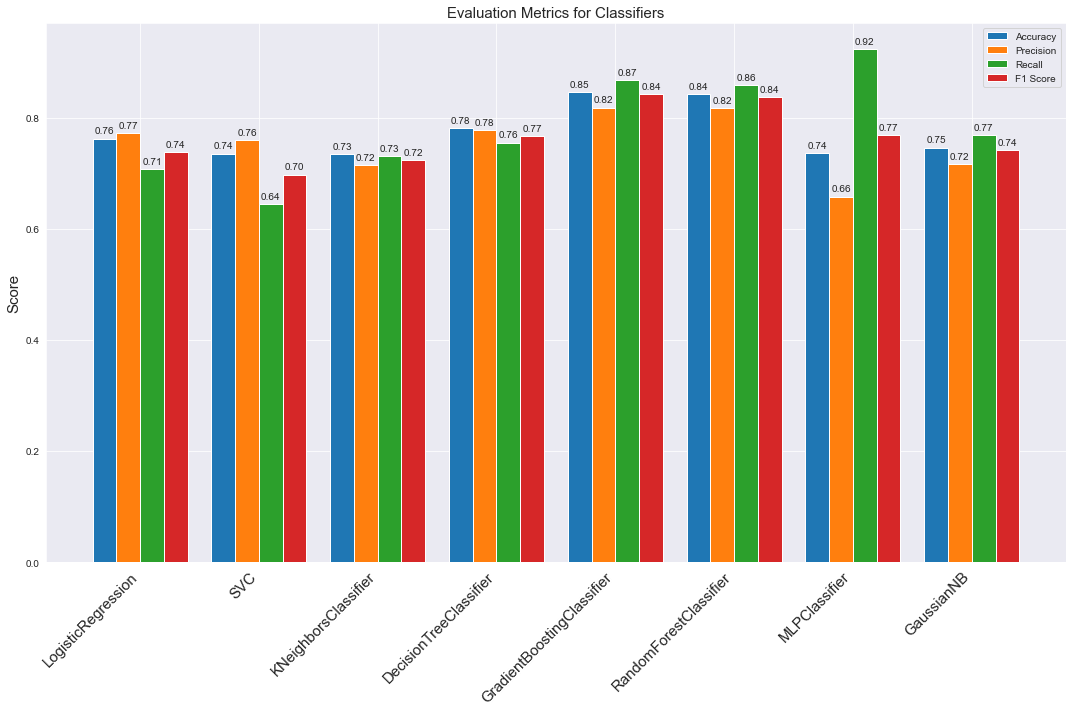

In [241]:
# Create a bar plot that shows all the evaluation metrics for each classifier
x = np.arange(len(classifier_names))
width = 0.2
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precisions, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recalls, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

# Add some text for labels, title and legend
ax.set_ylabel('Score', fontsize = 15)
ax.set_title('Evaluation Metrics for Classifiers', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(classifier_names, rotation=45, ha="right", fontsize = 15)
ax.legend(loc='upper right', fontsize = 10)

# Add the metric score values above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()

# Display the plot
plt.show()

In [238]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    GaussianNB()
]

In [239]:
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0    3    0        1          1        0     2343        1     0        2   
1    3    0        1          1        0       45        0     0        2   
2    2    9        1          1        0     1270        1     0        2   
3    3    7        1          1        0     2476        1     0        2   
4    3    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

Feature ranking:
1. feature 11 (0.549421)
2. feature 10 (0.107636)
3. feature 8 (0.083116)
4. feature 13 (0.082062)
5. feature 6 (0.048729)
6. feature 15 (0.044711)
7. feature 5 (0.019295)
8. feature 9 (0.014788)
9. feature 14 (0.014482)
10. feature 12 (0.009789)
11. feature 7 (0.008272)
12. feature 0 (0.007048)
13. feature 3 (0.004642)
14. feature 1 (0.003226)
15. feature 2 (0.002785)
16. feature 4 (0.000000)


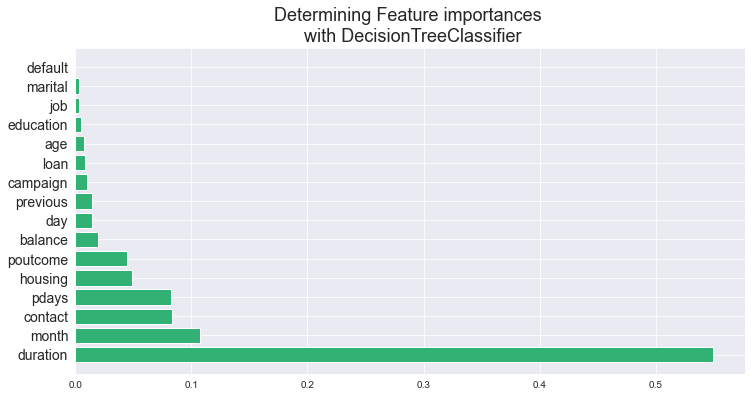

In [242]:
from sklearn.feature_selection import SelectFromModel
# Create train and test splits
target_name = 'deposit'
X = df.drop('deposit', axis=1)


label=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
clf = GradientBoostingClassifier()
clf = clf.fit(X_train,y_train)

clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
test_X_new = model.transform(X_test)

importances = clf.feature_importances_
feature_names = df.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

Conclusion                                                                                                                 

1) Months of Marketing Activity: We saw that the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject saving deposits offers. For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December and March should be under consideration because there were the months with the lowest marketing activity, there might be a reason why.)                                                                                                                                                                                                               

2) Seasonality: Potential clients opted to subscribe to the account during the seasons of fall and winter. The next marketing campaign should focus its activity throughout these seasons.                                                                                                                                                                                 

3) Campaign Calls: A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a saving account.                                                                                                                                                                         

4) Age Category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more saving accounts to open.                                                                                                                                                                                                             

5) Develop a Questionnaire during the Calls: Since duration of the call is the feature that most positively correlates with whether a potential client will open a the account or not, by providing an interesting questionnaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will open it. Nevertheless, we don't lose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of opening, and therefore an increase in effectiveness for the next marketing campaign the bank will execute.                                                                                                                                                                                                               


6) Target individuals with a higher duration: Target the target group that is above average in duration, there is a highly likelihood that this target group would open for opening the new account. This would allow that the success rate of the next marketing campaign would be highly successful.                                                                                                          

Here are the few recommendations for the bank than can help improve the deposit rate

•	Listen to the leads and extract more information to deliver the best deposit plan, which can increase the duration of calls and that can lead to a deposit.

•	Approaching the leads during the start of new bank period(May-July) will be a good choice as many have shown positive results from data history.
